In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Read the data
data = pd.read_csv('data.csv',header=None)
X=data.iloc[:,0:2]
y=data.iloc[:,2]

In [ ]:
model=SVC(kernel='rbf',C=1,gamma=27)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train,y_train)

SVC(C=1, gamma=27)

In [ ]:
print(model.predict([ [0.2, 0.8], [0.5, 0.4] ]))

[0 1]


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
acc=accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

Accuracy: 1.0


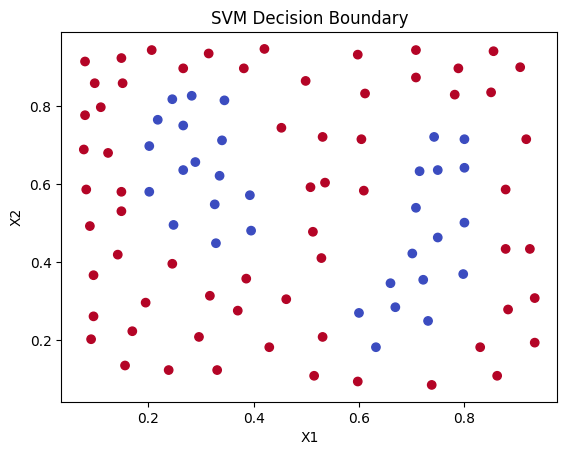

In [ ]:
# plot the decision boundary using simple scatter plot
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary')
plt.show()

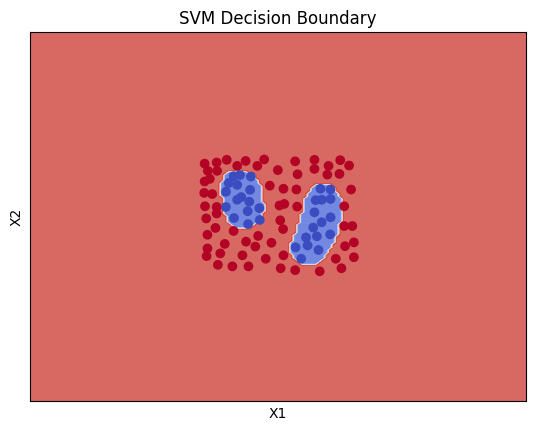

In [ ]:
# plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM Decision Boundary')
plt.show()


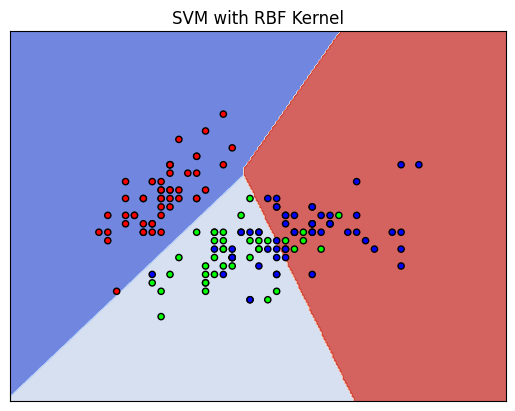

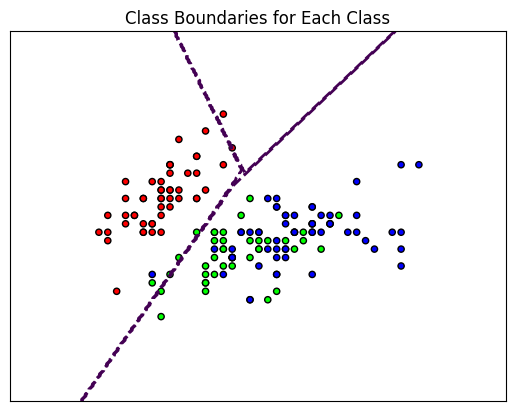

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model with RBF kernel
svm = SVC(kernel='linear', gamma=0.7, C=1.0)
svm.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

# Plot decision boundary
fig, ax = plt.subplots()
plot_decision_boundary(X, y, svm, ax, "SVM with RBF Kernel")
plt.show()

# Plot decision boundaries for each class
def plot_class_boundaries(X, y, model, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape + (3,))
    
    for i in range(3):
        ax.contour(xx, yy, Z[:, :, i], levels=[0], linewidths=2, linestyles='dashed')
    
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

# Plot class boundaries
fig, ax = plt.subplots()
plot_class_boundaries(X, y, svm, ax, "Class Boundaries for Each Class")
plt.show()
